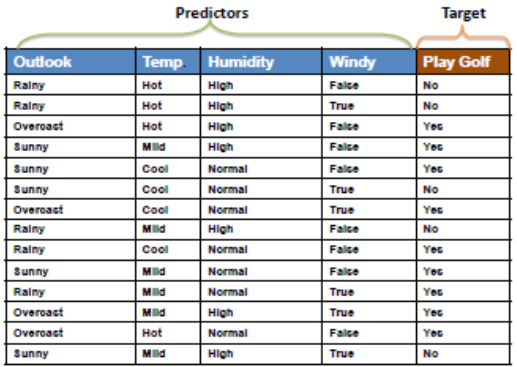

In [0]:
import numpy as np

class Node :  
    # Utility function to create a new tree node 
    def __init__(self ,key): 
        self.key = key  
        self.child = [] 

def outlookClass(outlook):
  if outlook=='sunny':
    return 0
  elif outlook=='overcast':
    return 1
  elif outlook=='rainy':
    return 2

def tempClass(temp):
  if temp=='hot':
    return 0
  elif temp=='mild':
    return 1
  elif temp=='cool':
    return 2

def humidityClass(humidity):
  if humidity=='high':
    return 0
  elif humidity=='normal':
    return 1

def windyClass(windy):
  if windy:
    return 0
  else:
    return 1

def playGolfClass(play_golf):
  if play_golf=='no':
    return 0
  else:
    return 1

def assignClasses(outlook,temp,humidity,windy,play_golf):
  for i in range(len(outlook)):
    outlook[i]=outlookClass(outlook[i])
  for i in range(len(temp)):
    temp[i]=tempClass(temp[i])
  for i in range(len(humidity)):
    humidity[i]=humidityClass(humidity[i])
  for i in range(len(windy)):
    windy[i]=windyClass(windy[i])
  for i in range(len(play_golf)):
    play_golf[i]=playGolfClass(play_golf[i])
  return outlook,temp,humidity,windy,play_golf

def calcEnt(data):
  return -((np.sum(data==0)/len(data)) * np.log2(np.sum(data==0)/len(data))) - ((np.sum(data==1)/len(data) * np.log2(np.sum(data==1)/len(data))))

def calcConditionalProb(data1,data2):
  conditional_prob0 = np.zeros(len(np.unique(data2)))
  conditional_prob1 = np.zeros(len(np.unique(data2)))
  for i in range(len(np.unique(data2))):
    conditional_prob0[i]=(np.sum((data2==i) & (data1==0)) + 1)/(np.sum(data2==i) + len(np.unique(data2)))
    conditional_prob1[i]=(np.sum((data2==i) & (data1==1)) + 1)/(np.sum(data2==i) + len(np.unique(data2)))
  return conditional_prob0, conditional_prob1

def calcConditionalEnt(data1,data2):
  conditional_ent = np.zeros(len(np.unique(data2)))
  j=0
  for i in np.unique(data2):
    if np.sum((data2==i) & (data1==0))==0 or np.sum((data2==i) & (data1==1))==0: 
      conditional_ent[j]=0
      j=j+1    
    else:
      conditional_ent[j]=(-np.sum((data2==i) & (data1==0))/(np.sum(data2==i)) * np.log2((np.sum((data2==i) & (data1==0)))/(np.sum(data2==i))) - (np.sum((data2==i) & (data1==1)))/(np.sum(data2==i)) * np.log2((np.sum((data2==i) & (data1==1)))/(np.sum(data2==i))))
      j=j+1
  return conditional_ent

def calcInformationGain(ent1,ent2,data):
  gain = np.sum((data==0))/len(data) * ent2[0]
  for i in range(1,len(ent2)):
    gain = gain + (np.sum((data==i))/len(data) * ent2[i])
  return (ent1 - gain)

def determineRoot(gain0,gain1,gain2,gain3,outlook,temp,humidity,windy):
  if max(gain0,gain1,gain2,gain3)==gain0:
    return outlook
  elif max(gain0,gain1,gain2,gain3)==gain1:
    return temp
  elif max(gain0,gain1,gain2,gain3)==gain2:
    return humidity
  else:
    return windy

def determineNode(gain1,gain2,gain3,temp,humidity,windy):
  if max(gain1,gain2,gain3)==gain1:
    return temp
  elif max(gain1,gain2,gain3)==gain2:
    return humidity
  else:
    return windy

def printNodeLevelWise(root): 
    if root is None: 
        return 
    queue = [] 
    queue.append(root) 
    while(len(queue) >0): 
        n = len(queue) 
        while(n > 0): 
            p = queue[0] 
            queue.pop(0) 
            print (p.key),  
            for index, value in enumerate(p.child): 
                queue.append(value) 
            n -= 1
        print ("")

def trainClassifier(outlook,temp,humidity,windy,play_golf):
  outlook,temp,humidity,windy,play_golf = assignClasses(outlook,temp,humidity,windy,play_golf)
  outlook,temp,humidity,windy,play_golf = np.asarray(outlook),np.asarray(temp),np.asarray(humidity),np.asarray(windy),np.asarray(play_golf)
  ent_play_golf, ent_outlook,ent_temp,ent_humidity,ent_windy = calcEnt(play_golf),calcConditionalEnt(play_golf,outlook),calcConditionalEnt(play_golf,temp),calcConditionalEnt(play_golf,humidity),calcConditionalEnt(play_golf,windy)
  gain_outlook,gain_temp,gain_humidity,gain_windy = calcInformationGain(ent_play_golf,ent_outlook,outlook), calcInformationGain(ent_play_golf,ent_temp,temp),calcInformationGain(ent_play_golf,ent_humidity,humidity),calcInformationGain(ent_play_golf,ent_windy,windy)
  r = determineRoot(gain_outlook,gain_temp,gain_humidity,gain_windy,outlook,temp,humidity,windy)
  root = Node(r)
  leaves = []
  for i in range(len(np.unique(r))):
    root.child.append(Node(i))
  for val in root.child:
    if np.sum((root.key==val.key) & (play_golf==0))==0:
      val.child.append(Node(1))
      leaves.append(1)
    elif np.sum((root.key==val.key) & (play_golf==1))==0:
      val.child.append(Node(0))
      leaves.append(0)
    else:
      pg = play_golf[r==val.key]
      ent = -np.sum((r==val.key) & (play_golf==0))/np.sum(r==val.key) * np.log2(np.sum((r==val.key) & (play_golf==0))/np.sum(r==val.key)) - np.sum((r==val.key) & (play_golf==1))/np.sum(r==val.key) * np.log2(np.sum((r==val.key) & (play_golf==1))/np.sum(r==val.key))
      arr1 = temp[r==val.key]
      ents1 = calcConditionalEnt(pg,arr1)
      arr2 = humidity[r==val.key]
      ents2 = calcConditionalEnt(pg,arr2)
      arr3 = windy[r==val.key]
      ents3 = calcConditionalEnt(pg,arr3)
      gain1,gain2,gain3 = calcInformationGain(ent,ents1,arr1),calcInformationGain(ent,ents2,arr2),calcInformationGain(ent,ents3,arr3)
      val.child.append(Node(determineNode(gain1,gain2,gain3,temp,humidity,windy)))
  children0 = root.child[0].child
  children1 = root.child[2].child
  for val in root.child[0].child:
    for i in np.unique(val.key):
      val.child.append(Node(i))
      if i==0:
        leaves.append(0)
      else:
        leaves.append(1)
  for val in root.child[2].child:
    for i in np.unique(val.key):
      val.child.append(Node(i))
      if i==0:
        leaves.append(0)
      else:
        leaves.append(1)
  root.child[0].child[0].child[0].child.append(Node(leaves[1]))
  root.child[0].child[0].child[1].child.append(Node(leaves[2]))
  root.child[2].child[0].child[0].child.append(Node(leaves[3]))
  root.child[2].child[0].child[1].child.append(Node(leaves[4]))
  # printNodeLevelWise(root)
  return root

def predict(o,t,h,w,tree):
  o,t,h,w = outlookClass(o),tempClass(t),humidityClass(h),windyClass(w)
  decided = False
  curr = tree
  while not decided:
    curr = curr.child[o]
    if isinstance(curr.child[0].key,np.ndarray):
      if o==2:
        curr = curr.child[0].child[h]
      elif o==0:
        curr = curr.child[0].child[w]
      decision = curr.child[0].key
      decided=True
    else:
      decision = curr.child[0].key
      decided=True  
  if decision==0:
    print("Not a good day to play golf!")
  else:
    print("A good day to play golf!")

outlook = ['rainy','rainy','overcast','sunny','sunny','sunny','overcast','rainy','rainy','sunny','rainy','overcast','overcast','sunny']
temp = ['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
humidity = ['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']
windy = [False,True,False,False,False,True,True,False,False,False,True,True,False,True]
play_golf = ['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

tree=trainClassifier(outlook,temp,humidity,windy,play_golf)

#Test1
predict('sunny', 'cool', 'high',True,tree)

# #Test2
# predict('overcast', 'mild', 'normal',True,tree)

# #Test3
# predict('rainy', 'hot', 'normal',True,tree)

# #Test4
# predict('overcast', 'cool', 'high',True,tree)

Not a good day to play golf!


In [0]:
outlook.extend(['sunny','overcast','rainy','overcast'])
temp.extend(['cool','mild','hot','cool'])
humidity.extend(['high','normal','normal','high'])
windy.extend([False,True,True,True])
play_golf.extend(['yes','yes','yes','yes'])
tree=trainClassifier(outlook,temp,humidity,windy,play_golf)

# #Part e
# predict('sunny', 'hot', 'high',False,tree)

In [0]:
predict('sunny','hot','high',True,tree)

Not a good day to play golf!
